In [1]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

%matplotlib inline
import matplotlib.pyplot as plt

import psycopg2 as pg
import numpy as np
import pandas as pd

import sys
sys.path.append("..")
from Cred.cred_user import username
from Cred.cred_p import pgpass
from Cred.cred_host import host_loc
from Cred.cred_port import cred_port

db = "HW07 Employee DB"

In [2]:
from sqlalchemy import create_engine
eng = create_engine('postgresql+psycopg2://'+ username +':' + pgpass + '@' +host_loc + ':' + cred_port + '/' + db)
conn = eng.connect()

In [3]:
print(eng.table_names())

['departments', 'employees', 'dept_emp', 'dept_mgr', 'salaries', 'titles']


In [4]:
salaries_df = pd.read_sql_query('select * from "salaries"', conn)
salaries_df.head(10)

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12
5,10006,40000.0,1990-08-05,1991-08-05
6,10007,56724.0,1989-02-10,1990-02-10
7,10008,46671.0,1998-03-11,1999-03-11
8,10009,60929.0,1985-02-18,1986-02-18
9,10010,72488.0,1996-11-24,1997-11-24


In [5]:
salaries_df.count()

emp_no       300024
salary       300024
from_date    300024
to_date      300024
dtype: int64

In [6]:
emp_sal_count = pd.DataFrame(salaries_df.groupby('emp_no')['emp_no'].nunique())
emp_sal_count.rename(columns={'emp_no':'count'}, inplace=True)
emp_sal_count = emp_sal_count.reset_index()
emp_sal_count.head()

,emp_no,count
0,10001,1
1,10002,1
2,10003,1
3,10004,1
4,10005,1


In [7]:
# Check for duplicate employee #
emp_sal_dup_check = emp_sal_count[emp_sal_count['count'] > 1]
if emp_sal_dup_check.shape[0] > 0:
    print("Duplicates")
    print(emp_dup_check)
else:
    print("No Duplicates")

No Duplicates


In [8]:
emp_df = pd.read_sql_query('select * from "employees"', conn)
emp_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [9]:
emp_df.count()

emp_no        300024
birth_date    300024
first_name    300024
last_name     300024
gender        300024
hire_date     300024
dtype: int64

In [10]:
emp_df_count = pd.DataFrame(emp_df.groupby('emp_no')['emp_no'].nunique())
emp_df_count.rename(columns={'emp_no':'count'}, inplace=True)
emp_df_count = emp_df_count.reset_index()
emp_df_count.head()

,emp_no,count
0,10001,1
1,10002,1
2,10003,1
3,10004,1
4,10005,1


In [11]:
# Check for duplicate employee #
emp_df_count_check = emp_df_count[emp_df_count['count'] > 1]
if emp_df_count_check.shape[0] > 0:
    print("Duplicates")
    print(emp_dup_check)
else:
    print("No Duplicates")

No Duplicates


In [12]:
titles_df = pd.read_sql_query('select * from "titles"', conn)
titles_df.head(10)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
9,10007,Staff,1989-02-10,1996-02-11


In [13]:
titles_df.count()

emp_no       443308
title        443308
from_date    443308
to_date      443308
dtype: int64

In [14]:
sal_title_merge_df = pd.merge(titles_df, salaries_df, on="emp_no", how="left")
sal_title_merge_df.rename(columns={'from_date_x':'title_from_date', 'to_date_x':'title_to_date', 
                  'from_date_y':'salary_from_date', 'to_date_y':'salary_to_date'}, inplace=True)
print(sal_title_merge_df.shape)
sal_title_merge_df.head(20)

(443308, 7)


,emp_no,title,title_from_date,title_to_date,salary,salary_from_date,salary_to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117.0,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828.0,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006.0,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054.0,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054.0,1986-12-01,1987-12-01
5,10005,Senior Staff,1996-09-12,9999-01-01,78228.0,1989-09-12,1990-09-12
6,10005,Staff,1989-09-12,1996-09-12,78228.0,1989-09-12,1990-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01,40000.0,1990-08-05,1991-08-05
8,10007,Senior Staff,1996-02-11,9999-01-01,56724.0,1989-02-10,1990-02-10
9,10007,Staff,1989-02-10,1996-02-11,56724.0,1989-02-10,1990-02-10


In [15]:
sal_title_df = pd.DataFrame(sal_title_merge_df, columns=["title", "salary"])
print(sal_title_df.shape)
sal_title_df.head()

(443308, 2)


,title,salary
0,Senior Engineer,60117.0
1,Staff,65828.0
2,Senior Engineer,40006.0
3,Engineer,40054.0
4,Senior Engineer,40054.0


In [16]:
sal_title_avg_df = pd.DataFrame(sal_title_df.groupby("title")["salary"].mean())
sal_title_avg_df = sal_title_avg_df.reset_index()
sal_title_avg_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


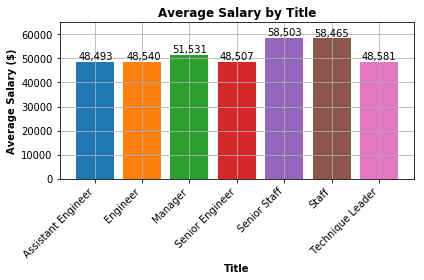

In [17]:
x0 = sal_title_avg_df["title"][0]
y0 = sal_title_avg_df["salary"][0]

x1 = sal_title_avg_df["title"][1]
y1 = sal_title_avg_df["salary"][1]

x2 = sal_title_avg_df["title"][2]
y2 = sal_title_avg_df["salary"][2]

x3 = sal_title_avg_df["title"][3]
y3 = sal_title_avg_df["salary"][3]

x4 = sal_title_avg_df["title"][4]
y4 = sal_title_avg_df["salary"][4]

x5 = sal_title_avg_df["title"][5]
y5 = sal_title_avg_df["salary"][5]

x6 = sal_title_avg_df["title"][6]
y6 = sal_title_avg_df["salary"][6]


loc_x0 = -.33
loc_x1 = -.33 + 1
loc_x2 = -.36 + 2
loc_x3 = -.36 + 3
loc_x4 = -.36 + 4
loc_x5 = -.36 + 5
loc_x6 = -.36 + 6

asst_eng ='{:0,}'.format(int(round(sal_title_avg_df["salary"][0])))
eng = '{:0,}'.format(int(round(sal_title_avg_df["salary"][1])))
mgr ='{:0,}'.format(int(round(sal_title_avg_df["salary"][2])))
sr_eng = '{:0,}'.format(int(round(sal_title_avg_df["salary"][3])))
sr_staff ='{:0,}'.format(int(round(sal_title_avg_df["salary"][4])))
staff = '{:0,}'.format(int(round(sal_title_avg_df["salary"][5])))
tech_ld = '{:0,}'.format(int(round(sal_title_avg_df["salary"][6])))

plt.bar(x0, y0)
plt.bar(x1, y1) 
plt.bar(x2, y2) 
plt.bar(x3, y3) 
plt.bar(x4, y4) 
plt.bar(x5, y5) 
plt.bar(x6, y6) 

plt.ylim(0,65000)
                                                             
plt.text(loc_x0, y0 + 1000, asst_eng, color="black")
plt.text(loc_x1, y1 + 1000, eng, color="black")
plt.text(loc_x2, y2 + 1000, mgr, color="black")
plt.text(loc_x3, y3 + 1000, sr_eng, color="black")
plt.text(loc_x4, y4 + 1000, sr_staff, color="black")
plt.text(loc_x5, y5 + 1000, staff, color="black")
plt.text(loc_x6, y6 + 1000, tech_ld, color="black")

plt.title("Average Salary by Title", fontweight='bold')
plt.xlabel("Title", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Salary ($)", fontweight="bold")

plt.grid()

plt.tight_layout()

plt.savefig('../Img/AvgSalTitle.png') 
plt.show()